In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [58]:
df = pd.read_csv('arbitrage_results.csv')

In [3]:
df.head()

,timestamp,price,action_kw,energy_kwh,soc_before,soc_after,revenue,cumulative_revenue
0,2025-09-13 13:00:00+00:00,0.000179,0.0,0.000000,250.00000,250.00000,0.000000,0.000000
1,2025-09-13 13:05:00+00:00,0.042592,-100.0,-8.333333,250.00000,241.22807,0.353482,0.353482
2,2025-09-13 13:10:00+00:00,0.042422,-100.0,-8.333333,241.22807,232.45614,0.352071,0.705553
3,2025-09-13 13:15:00+00:00,-0.000618,0.0,0.000000,232.45614,232.45614,0.000000,0.705553
4,2025-09-13 13:20:00+00:00,-0.000623,0.0,0.000000,232.45614,232.45614,0.000000,0.705553


In [20]:
(-(df.soc_after - df.soc_before) * df.price).sum()

59.05695230355909

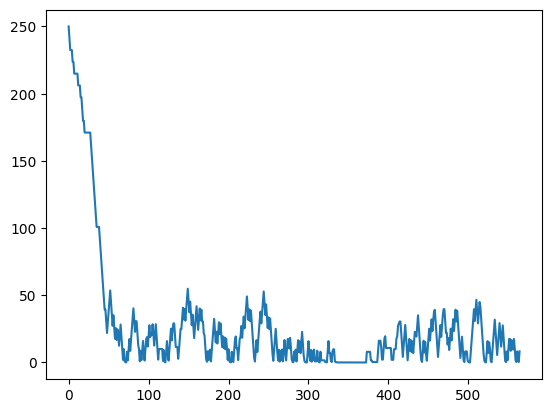

In [19]:
plt.plot(np.arange(len(df)), df.soc_after)

In [16]:
len(df)

565

In [21]:
action = (df.soc_after - df.soc_before)

(array([175.,  26.,   7.,   4.,  23., 124.,  10.,   1.,   3., 192.]),
 array([-8.77192982, -7.10307018, -5.43421053, -3.76535088, -2.09649123,
        -0.42763158,  1.24122807,  2.91008772,  4.57894737,  6.24780702,
         7.91666667]),
 <BarContainer object of 10 artists>)

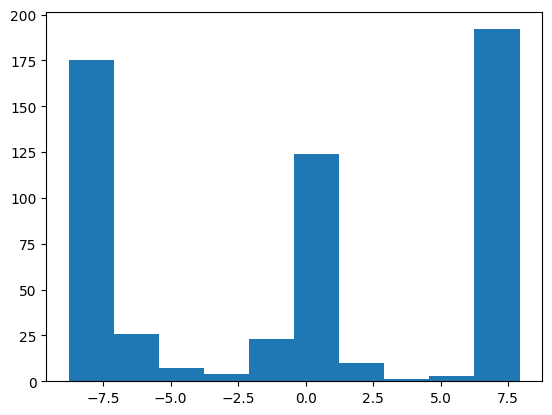

In [24]:
plt.hist(action, bins=10)

In [81]:
#analzye the grid data from different power plants

In [32]:
df = pd.read_csv('solar_us.csv')
df.columns

Index(['Plant Name', 'Developer Name', 'Capacity (MW)', 'Date of Operation',
       'County', 'State', 'Balancing Authority'],
      dtype='object')

In [34]:
df.head().sort_values(by=['Capacity (MW)'], ascending=False)

,Plant Name,Developer Name,Capacity (MW),Date of Operation,County,State,Balancing Authority
3,"Eland Solar & Storage Center, Phase 2 Hy",Avantus,200.0,01/07/2025,Kern,CA,LDWP
4,Bakeoven Solar,Avangrid Renewables,60.0,01/07/2025,Wasco,OR,AVRN
1,Corpus Refinery,Flint Hills Resources,27.5,01/07/2025,Nueces,TX,ERCO
0,CTGB Maloney and Webster,TotalEnergies,2.0,01/07/2025,Tolland,CT,ISNE
2,CSU Northridge Plant,Unable to find,0.8,01/07/2025,Los Angeles,CA,LDWP


In [116]:
df = pd.read_csv('data/2025-08-25_2025-09-25_open_metero_weather_data.csv')

In [117]:
df.shape

(768, 43)

In [118]:
df.head()

,date,temperature_2m,relative_humidity_2m,snow_depth,snowfall,showers,rain,precipitation,precipitation_probability,apparent_temperature,...,wind_speed_10m,soil_temperature_0cm,soil_temperature_6cm,soil_temperature_18cm,soil_temperature_54cm,soil_moisture_0_to_1cm,soil_moisture_1_to_3cm,soil_moisture_3_to_9cm,soil_moisture_9_to_27cm,soil_moisture_27_to_81cm
0,2025-08-25 00:00:00+00:00,39.669502,21.0,0.0,0.0,0.0,0.0,0.0,11.0,39.220190,...,10.105681,44.6985,40.848503,33.048500,29.898500,0.055,0.080,0.105,0.131,0.155
1,2025-08-25 01:00:00+00:00,38.919502,21.0,0.0,0.0,0.0,0.0,0.0,11.0,39.072395,...,4.553680,39.7985,39.848503,33.548500,29.898500,0.056,0.079,0.105,0.131,0.155
2,2025-08-25 02:00:00+00:00,37.569500,24.0,0.0,0.0,0.0,0.0,0.0,7.0,38.231335,...,3.240000,34.9985,38.198500,33.898502,29.948500,0.057,0.079,0.105,0.131,0.155
3,2025-08-25 03:00:00+00:00,35.419502,25.0,0.0,0.0,0.0,0.0,0.0,1.0,35.785700,...,2.545584,31.0485,36.098503,33.998500,29.948500,0.059,0.078,0.105,0.131,0.155
4,2025-08-25 04:00:00+00:00,34.269500,25.0,0.0,0.0,0.0,0.0,0.0,1.0,34.647320,...,0.360000,29.5485,34.298500,33.948500,29.998499,0.061,0.078,0.105,0.130,0.155


In [119]:
df.columns

Index(['date', 'temperature_2m', 'relative_humidity_2m', 'snow_depth',
       'snowfall', 'showers', 'rain', 'precipitation',
       'precipitation_probability', 'apparent_temperature', 'dew_point_2m',
       'weather_code', 'pressure_msl', 'surface_pressure', 'cloud_cover',
       'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'visibility',
       'evapotranspiration', 'et0_fao_evapotranspiration',
       'vapour_pressure_deficit', 'temperature_180m', 'temperature_80m',
       'temperature_120m', 'wind_gusts_10m', 'wind_direction_180m',
       'wind_direction_120m', 'wind_direction_80m', 'wind_direction_10m',
       'wind_speed_180m', 'wind_speed_120m', 'wind_speed_80m',
       'wind_speed_10m', 'soil_temperature_0cm', 'soil_temperature_6cm',
       'soil_temperature_18cm', 'soil_temperature_54cm',
       'soil_moisture_0_to_1cm', 'soil_moisture_1_to_3cm',
       'soil_moisture_3_to_9cm', 'soil_moisture_9_to_27cm',
       'soil_moisture_27_to_81cm'],
      dtype='object')

In [125]:
df_dropped = df.drop(['date'], axis=1)

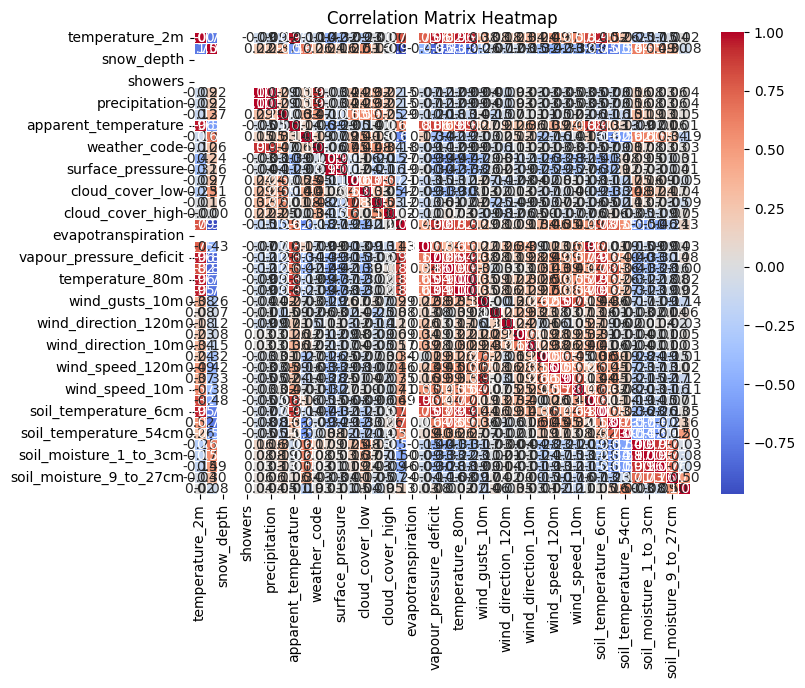

In [126]:
corr = df_dropped.corr()

plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

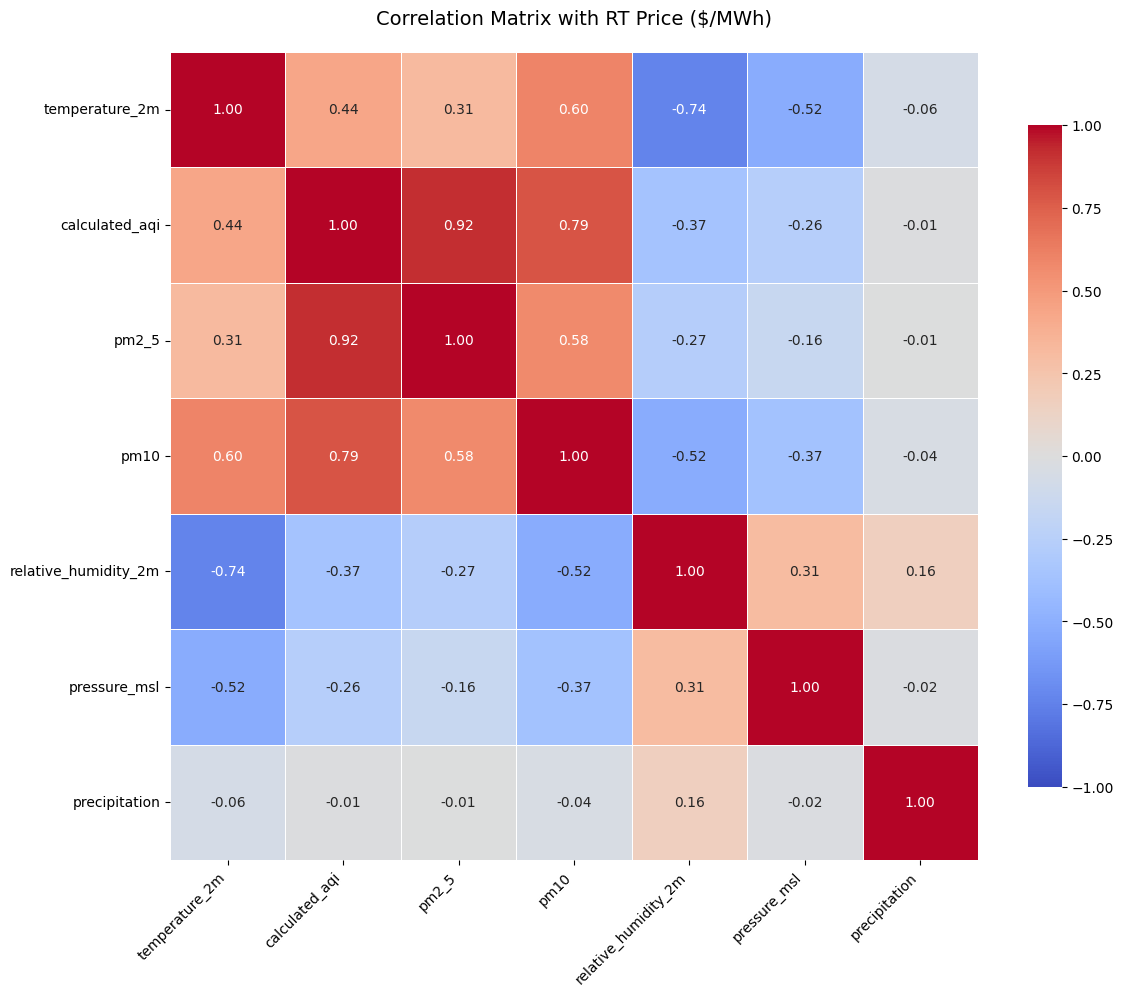

In [114]:
  # Select the most important variables for correlation analysis
  important_vars = [
      'rt_price_mwh',
      'da_price_mwh',
      'temperature_2m',
      'calculated_aqi',
      'pm2_5',
      'pm10',
      'wind_speed_10m',
      'wind_speed_100m',
      'cloud_cover',
      'relative_humidity_2m',
      'pressure_msl',
      'precipitation',
      'ozone',
      'wind_direction_10m',
      'soil_temperature_0_to_7cm'
  ]

  # Filter dataframe to only include existing columns
  cols_to_plot = [col for col in important_vars if col in df.columns]

  # Calculate correlation matrix
  corr_matrix = df[cols_to_plot].corr()

  # Create figure and plot
  plt.figure(figsize=(12, 10))
  sns.heatmap(corr_matrix,
              annot=True,  # Show correlation values
              fmt='.2f',   # Format to 2 decimal places
              cmap='coolwarm',  # Red for positive, blue for negative
              center=0,    # Center colormap at 0
              vmin=-1, vmax=1,  # Set scale from -1 to 1
              square=True,  # Make cells square
              linewidths=0.5,  # Add gridlines
              cbar_kws={"shrink": 0.8})  # Adjust colorbar size

  plt.title('Correlation Matrix with RT Price ($/MWh)', fontsize=14, pad=20)
  plt.xticks(rotation=45, ha='right')
  plt.yticks(rotation=0)
  plt.tight_layout()
  plt.show()

  # Print top correlations with rt_price_mwh
  if 'rt_price_mwh' in df.columns:
      rt_correlations = corr_matrix['rt_price_mwh'].sort_values(ascending=False)
      print("\nTop correlations with RT Price:")
      print(rt_correlations[rt_correlations.index != 'rt_price_mwh'].head(10))

In [115]:
df.isnull().sum()

datetime                 0
location_name            0
operator                 0
capacity_mw              0
county                   0
state                    0
grid                     0
latitude                 0
longitude                0
calculated_aqi           0
pm10                     0
pm2_5                    0
temperature_2m          30
relative_humidity_2m    30
precipitation           30
pressure_msl            30
dew_point_2m            30
apparent_temperature    30
rain                    30
snowfall                30
weather_code            30
surface_pressure        30
dust                     0
uv_index                 0
uv_index_clear_sky       0
dtype: int64

In [127]:
df1 = pd.read_csv('data/2025-08-01_2025-09-01_open_metero_weather_data.csv')